# Extracting spectra from mospy products
### Olivia Cooper
### July 2022

In [9]:
# the basics

import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.table import Table
import extract_1d_spec as ex ### this is the code to do the extraction, go look at the script!
import read_mospy_files as rmp ## script I made to read in mospy files
plt.style.use('../../cooper-paper.mplstyle')

In [5]:
### CHANGE THESE TO MATCH YOUR PATH AND OBJECT YOU WANT

obj_name = 'B_WP450980' ### change me!
dir = '../wmmc01/wmmc01_Y_' ### change me! this path WILL be different on your computer

In [6]:
# manually extract 1D spec

ypix = 23 ### change me to the ypixel you are extracting the spectrum from
wav, opt, opterr, box, boxerr = ex.extract1d(obj=obj_name,path=dir,ycen=ypix,aper=7,width=4) 


Reading in data for B_WP450980
Dimensions: 	 signal spectrum (48, 1373)
		 error spectrum (48, 1373)


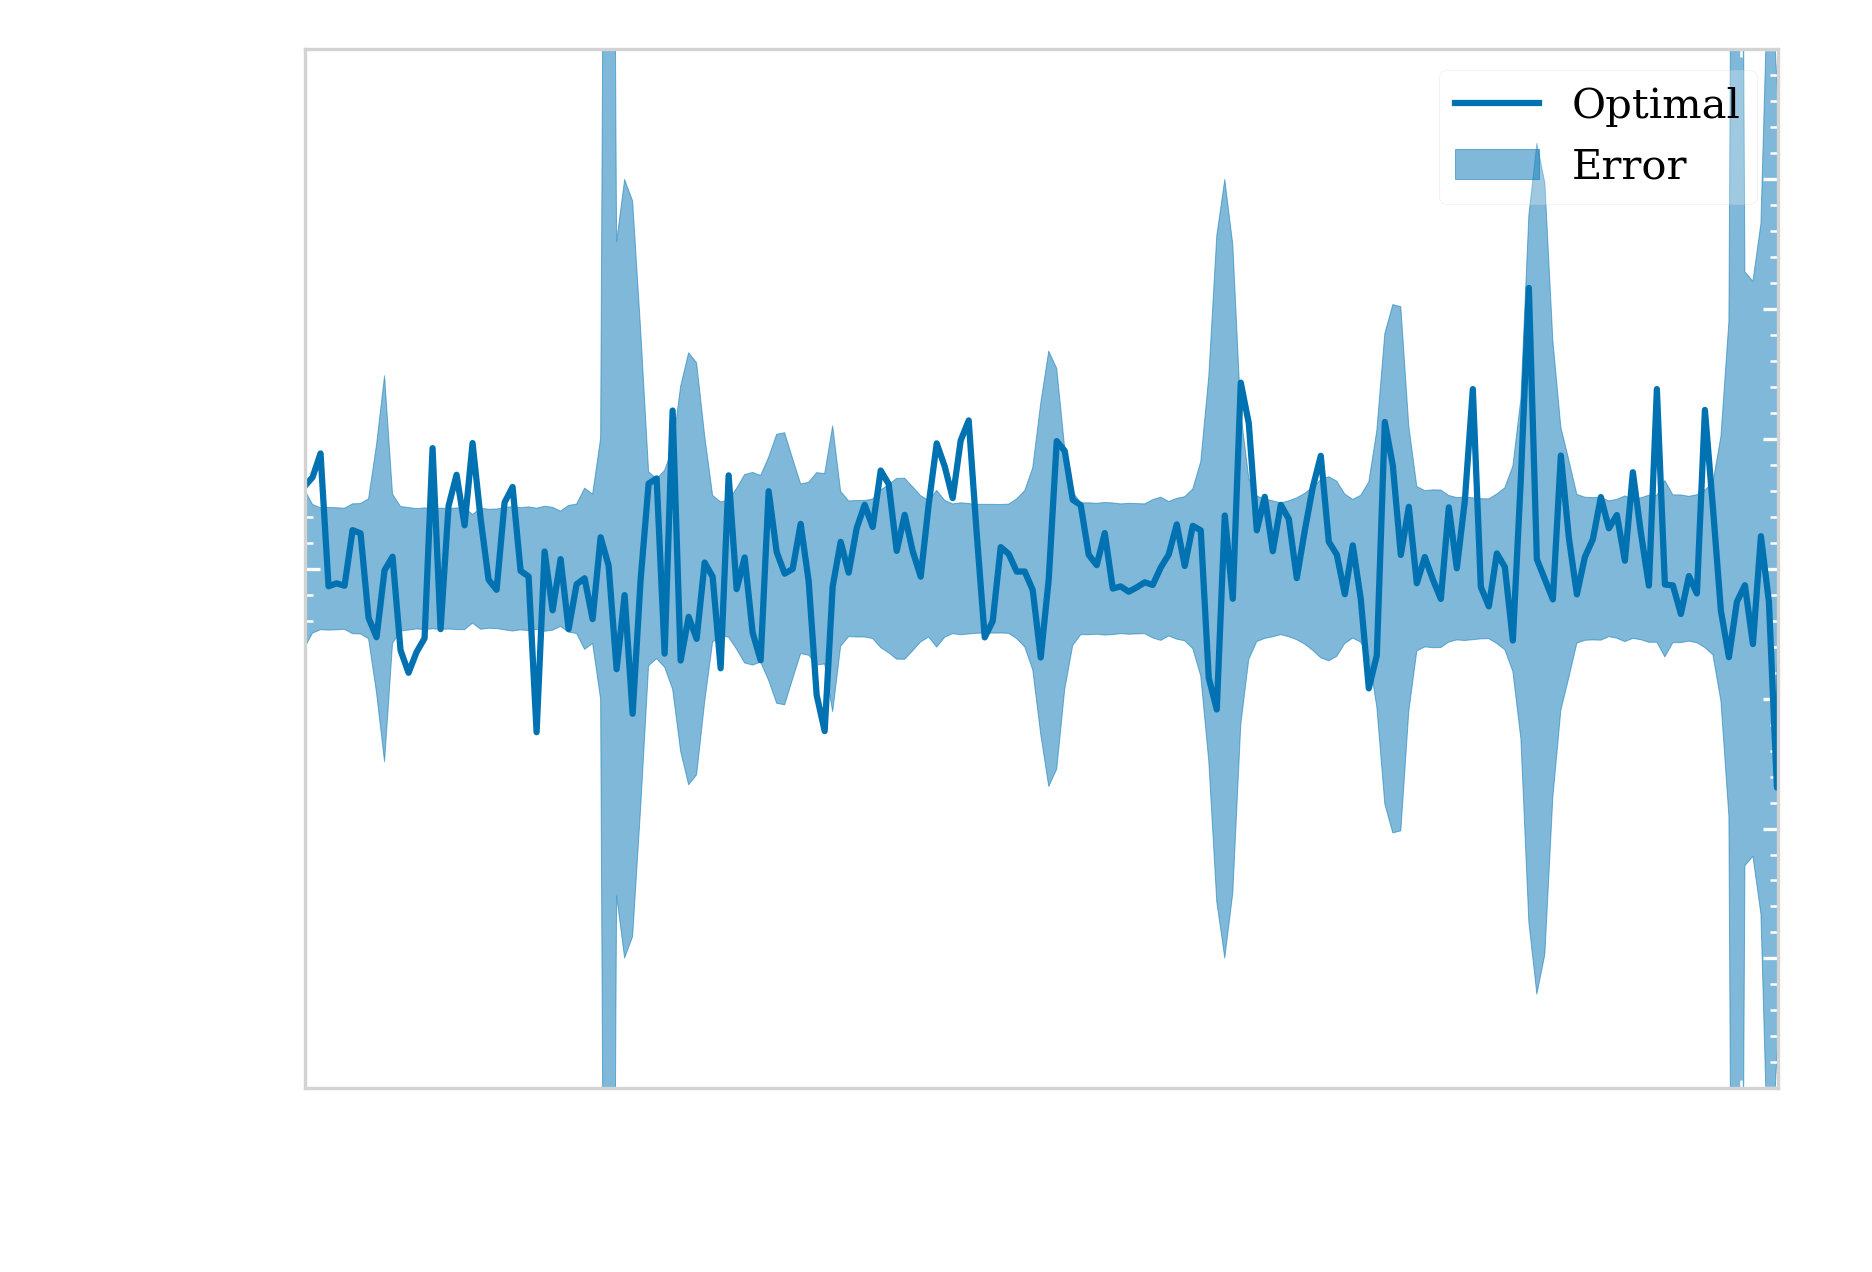

In [7]:
# plot optimal

plt.plot(wav,opt,label='Optimal')
plt.fill_between(wav,opterr,-1*opterr,alpha=0.5,color='C0',label='Error')
plt.xlim(9750,9950) ### change me!
plt.ylim(-0.02,0.02) ### change me!
plt.xlabel(r'Wavelength $[\AA]$')
plt.ylabel(r'Flux')
plt.grid(False)
plt.legend()

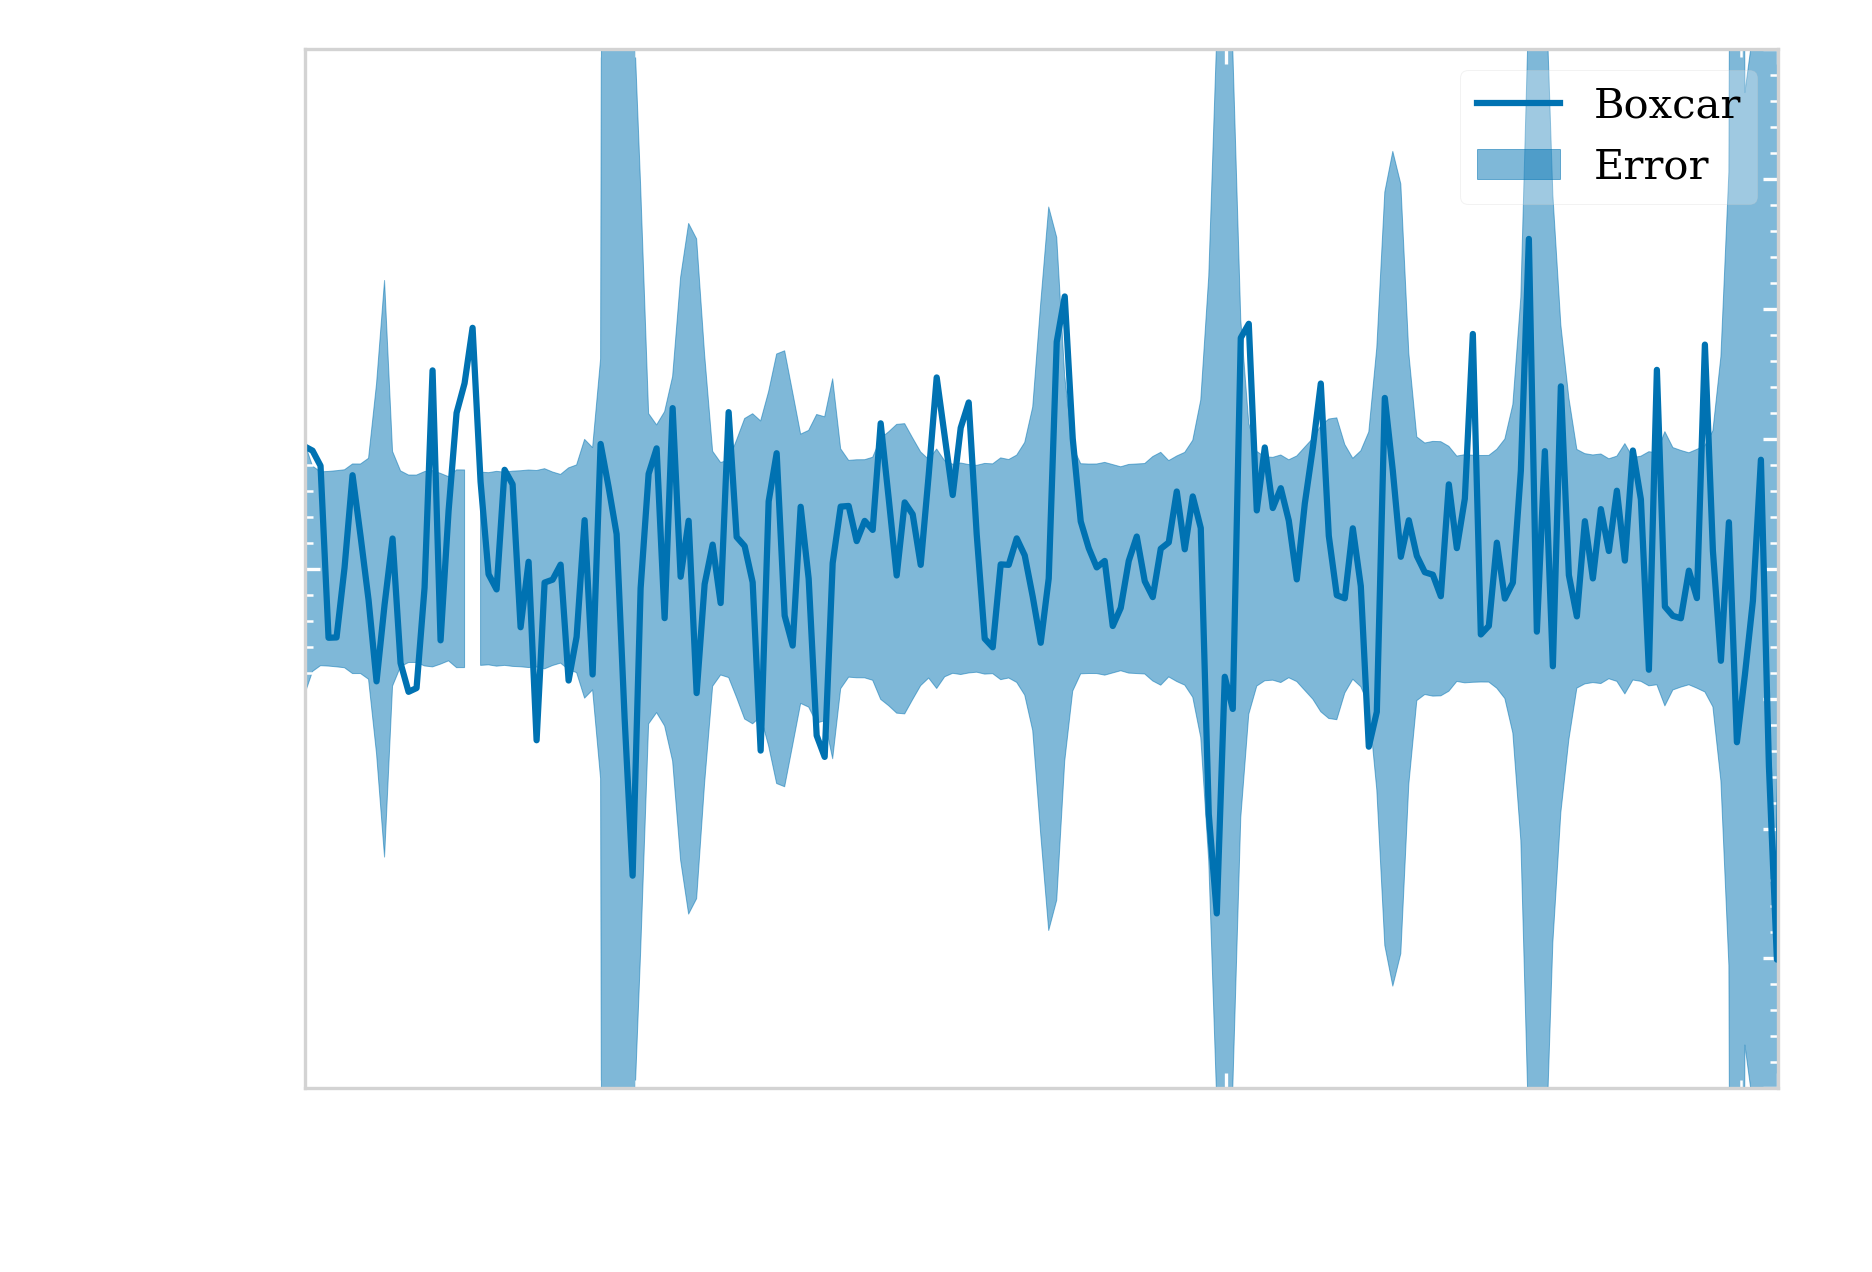

In [8]:
# plot boxcar

plt.plot(wav,box,label='Boxcar')
plt.fill_between(wav,boxerr,-1*boxerr,alpha=0.5,color='C0',label='Error')
plt.xlim(9750,9950) ### change me!
plt.ylim(-0.1,0.1) ### change me!
plt.xlabel(r'Wavelength $[\AA]$')
plt.ylabel(r'Flux')
plt.grid(False)
plt.legend()

In [10]:
# compare to the mospy extraction

hdu1 = fits.open(dir+obj_name+'_1D_00.fits') # 1D spectrum
pix_obj, wav_obj, spec1d_obj = rmp.make_1d_array(ext=0,hdu=hdu1) # object spectrum
pix_sky, wav_sky, spec1d_sky = rmp.make_1d_array(ext=1,hdu=hdu1) # sky spectrum

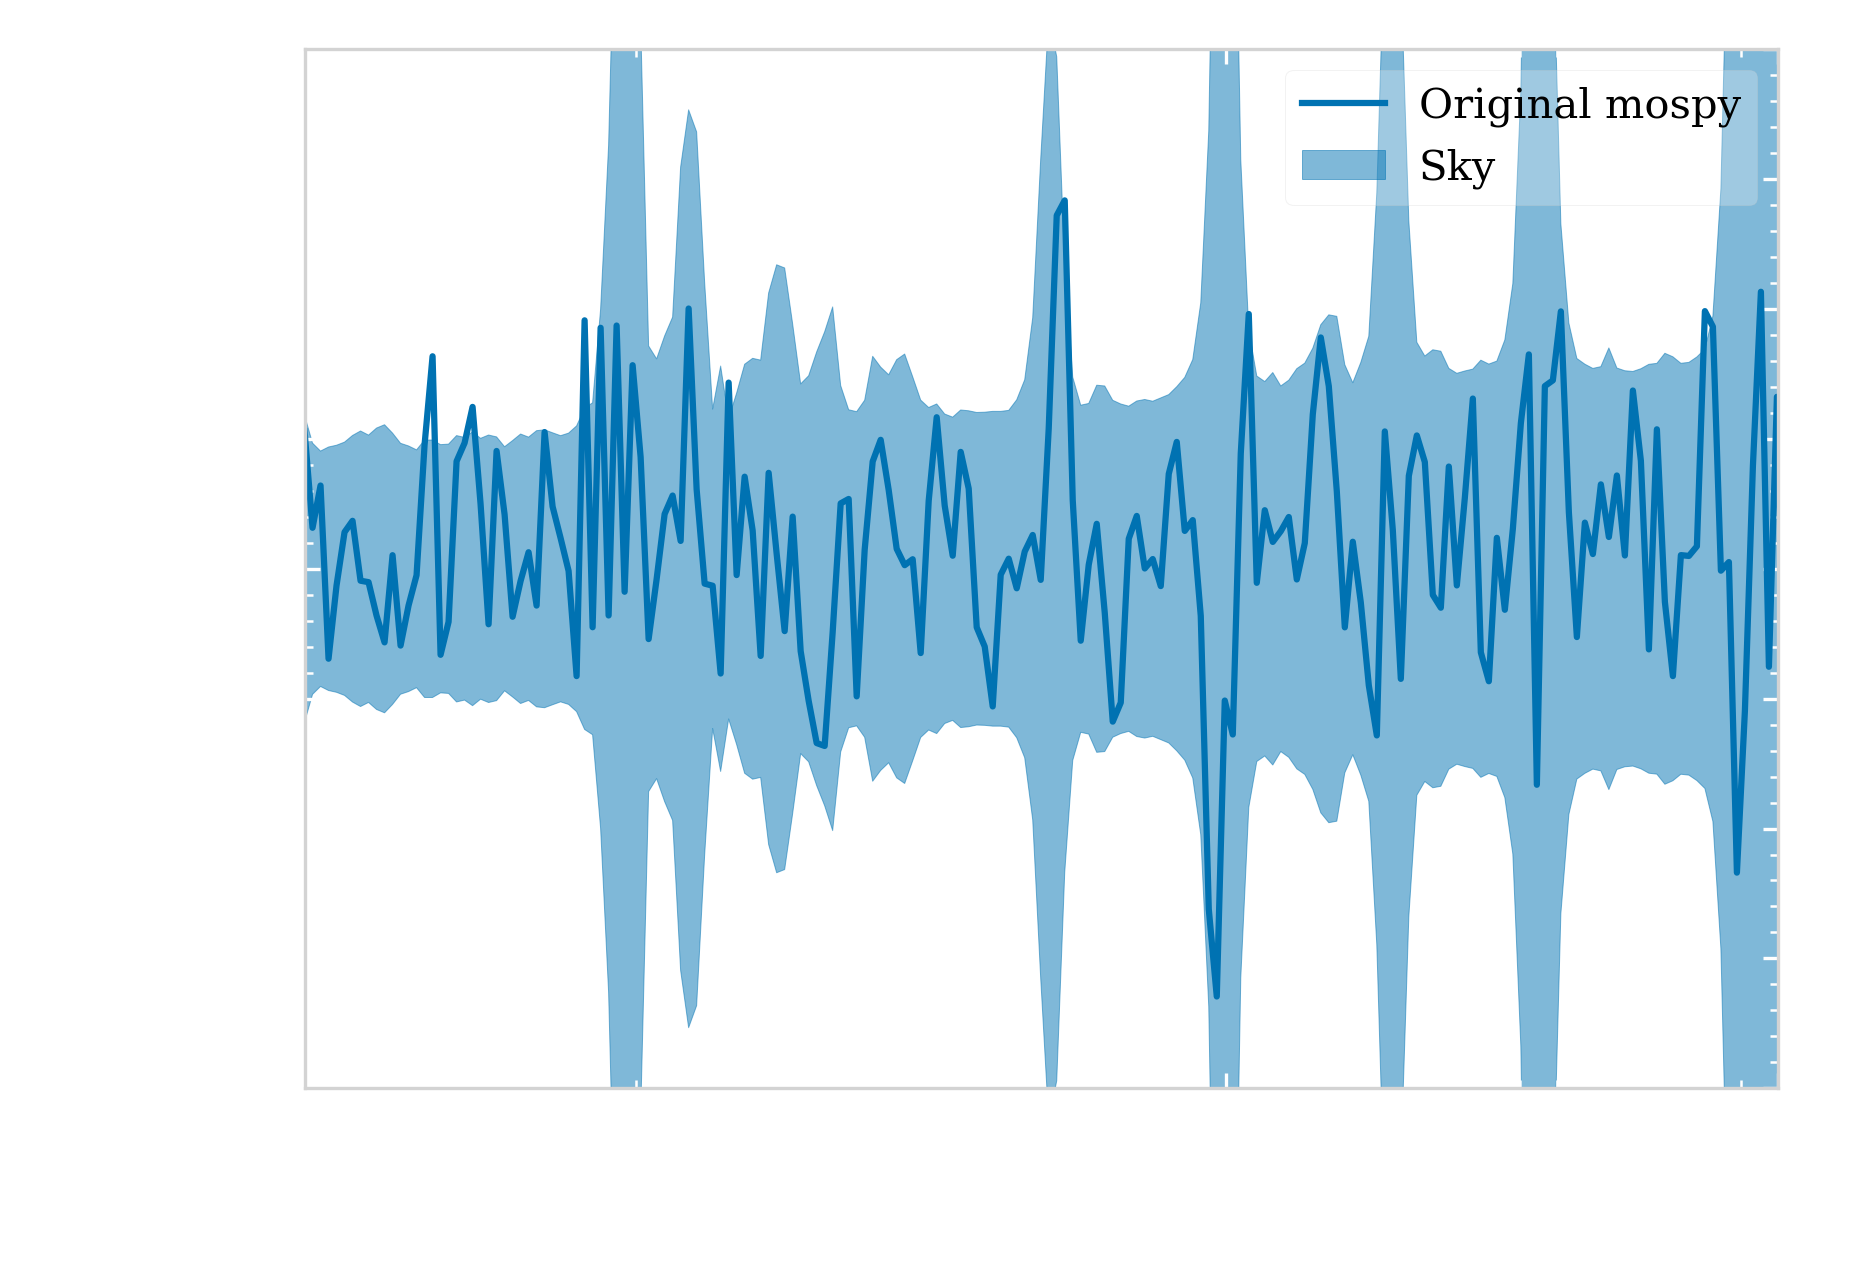

In [11]:
# plot mospy

plt.plot(wav_obj,spec1d_obj,label='Original mospy')
plt.fill_between(wav_sky,spec1d_sky,-1*spec1d_sky,alpha=0.5,color='C0',label='Sky')
plt.xlim(9750,9950) ### change me!
plt.ylim(-0.1,0.1) ### change me!
plt.xlabel(r'Wavelength $[\AA]$')
plt.ylabel(r'Flux')
plt.grid(False)
plt.legend()